In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | washougal
Processing Record 3 of Set 1 | lakselv
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | ondangwa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | tiznit
Processing Record 11 of Set 1 | magdeburg
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | nchelenge
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | presidencia roque saenz pena
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | saint anthony
Processing Record 21 of Set 1 | lompoc
Process

Processing Record 34 of Set 4 | honningsvag
Processing Record 35 of Set 4 | takatsuki
Processing Record 36 of Set 4 | dimitrovgrad
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | kirakira
Processing Record 40 of Set 4 | taft
Processing Record 41 of Set 4 | pastos bons
Processing Record 42 of Set 4 | batemans bay
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | bjerringbro
Processing Record 45 of Set 4 | sattahip
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | cocobeach
Processing Record 49 of Set 4 | kuytun
Processing Record 50 of Set 4 | parkes
Processing Record 1 of Set 5 | yarmouth
Processing Record 2 of Set 5 | utiroa
City not found. Skipping...
Processing Record 3 of Set 5 | ambon
Processing Record 4 of Set 5 | khasan
Processing Record 5 of Set 5 | almaznyy
Processing Record 6 of Set 5 | yulara
Processing Record 7 of 

Processing Record 27 of Set 8 | stara pazova
Processing Record 28 of Set 8 | satitoa
City not found. Skipping...
Processing Record 29 of Set 8 | atar
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | kaeo
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | padre bernardo
Processing Record 35 of Set 8 | sergeyevka
Processing Record 36 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 37 of Set 8 | mandurah
Processing Record 38 of Set 8 | conde
Processing Record 39 of Set 8 | hvide sande
Processing Record 40 of Set 8 | ballina
Processing Record 41 of Set 8 | chumikan
Processing Record 42 of Set 8 | straumen
Processing Record 43 of Set 8 | amahai
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | kayes
Processing Record 46 of Set 8 | hovd
Processing Record 47 of Set 8 | chimbarongo
Processing Record 48 of Set 8 | samana
Processing Record 49 of Set 8 | ponta do sol
Proces

Processing Record 10 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 11 of Set 12 | nicoya
Processing Record 12 of Set 12 | limot
Processing Record 13 of Set 12 | mar del plata
Processing Record 14 of Set 12 | inhambane
Processing Record 15 of Set 12 | montecristi
Processing Record 16 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 17 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 12 | sainte-anne-des-monts
Processing Record 19 of Set 12 | penarroya-pueblonuevo
Processing Record 20 of Set 12 | petushki
Processing Record 21 of Set 12 | bolu
Processing Record 22 of Set 12 | mina
Processing Record 23 of Set 12 | manaure
Processing Record 24 of Set 12 | eldama ravine
Processing Record 25 of Set 12 | jiddah
City not found. Skipping...
Processing Record 26 of Set 12 | seydi
Processing Record 27 of Set 12 | eureka
Processing Record 28 of Set 12 | zapadnaya dvina
Processing Record 29 of Set 12 | osmena
Processing Record 30

In [15]:
len(city_data)

546

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,74.26,75,100,12.46,ZA,2022-03-08 00:09:22
1,Washougal,45.5826,-122.3534,59.76,69,0,8.05,US,2022-03-08 00:09:23
2,Lakselv,70.0513,24.9718,24.62,80,75,13.80,NO,2022-03-08 00:09:23
3,Kavaratti,10.5669,72.6420,80.73,71,25,2.10,IN,2022-03-08 00:09:24
4,Ondangwa,-17.9167,15.9500,75.94,55,72,10.71,NA,2022-03-08 00:09:25
5,Punta Arenas,-53.1500,-70.9167,51.91,82,0,16.11,CL,2022-03-08 00:09:25
6,Severo-Kurilsk,50.6789,156.1250,33.46,97,98,24.18,RU,2022-03-08 00:09:26
7,Raudeberg,61.9875,5.1352,38.86,74,98,17.98,NO,2022-03-08 00:09:26
8,Tiznit,29.5833,-9.5000,48.58,85,21,3.36,MA,2022-03-08 00:09:27
9,Magdeburg,52.1667,11.6667,33.93,80,20,3.94,DE,2022-03-08 00:09:27


In [20]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-03-08 00:09:22,-33.0153,27.9116,74.26,75,100,12.46
1,Washougal,US,2022-03-08 00:09:23,45.5826,-122.3534,59.76,69,0,8.05
2,Lakselv,NO,2022-03-08 00:09:23,70.0513,24.9718,24.62,80,75,13.80
3,Kavaratti,IN,2022-03-08 00:09:24,10.5669,72.6420,80.73,71,25,2.10
4,Ondangwa,NA,2022-03-08 00:09:25,-17.9167,15.9500,75.94,55,72,10.71
...,...,...,...,...,...,...,...,...,...
541,Luganville,VU,2022-03-08 00:24:29,-15.5333,167.1667,86.56,68,75,6.06
542,Kargopol,RU,2022-03-08 00:21:08,61.5071,38.9456,-19.10,100,85,2.82
543,Kosh-Agach,RU,2022-03-08 00:25:30,50.0000,88.6667,11.26,94,100,4.38
544,Talcahuano,CL,2022-03-08 00:25:30,-36.7167,-73.1167,58.86,80,1,12.30


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

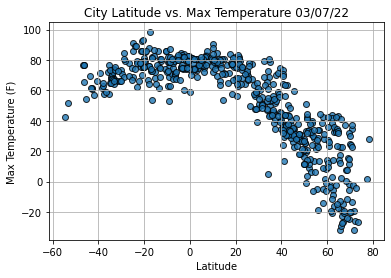

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

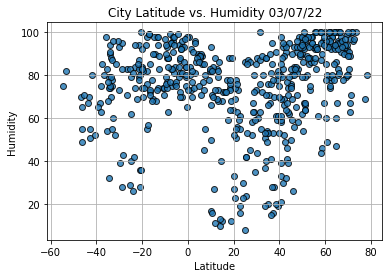

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

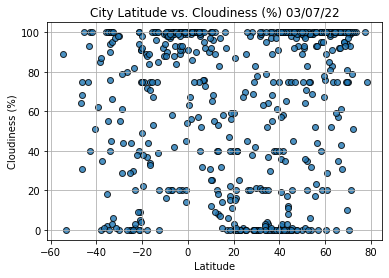

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

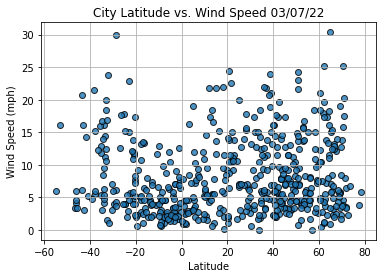

In [30]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()